<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/svmmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from glob import glob
from skimage.io import imread
from skimage.transform import resize
import skimage
import os

In [297]:
def load_image_files(container_path, dimension=(104, 104)):
    
    image_directory = Path(container_path)
    folders = [directory for directory in image_directory.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    images = []
    flatten_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flatten_data = np.array(flatten_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flatten_data,
                 target=target,
                 target_names=categories,
                 images=images,
                )

In [321]:
data='/content/drive/MyDrive/kaggle/rice/rice disease'

In [299]:
dataset = load_image_files(data) 
print(image_dataset.target_names)

['Healthy', 'Leaf smut', 'Brown spot', 'Bacterial leaf blight']


In [322]:
image_count = []
class_names = []

for folder in os.listdir(os.path.join(data)):
    folder_num = len(os.listdir(os.path.join(data, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)

Healthy              40
Leaf smut            40
Brown spot           40
Bacterial leaf blight 40


In [312]:
 X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3,random_state=109)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
  

0.8541666666666666


In [313]:
print("Classification report = - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.69      0.90      0.78        10
           2   

In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0  0]
 [ 0  9  0  1]
 [ 0  2  8  2]
 [ 0  2  0 12]]


In [315]:
print(y_pred)

[3 0 1 0 2 0 0 3 3 1 1 3 1 3 0 1 3 2 2 1 3 0 0 0 3 0 2 2 0 2 3 3 0 3 3 1 0
 3 3 1 1 1 2 1 3 1 1 2]


In [316]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flatten_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flatten_data.append(img_resized.flatten()) 
    return image,flat_data

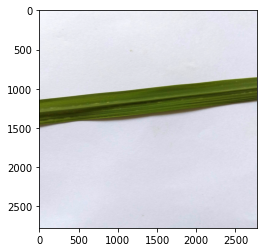

Predicted Disease is Healthy


In [324]:
plot , img = load_image(r'/content/drive/MyDrive/kaggle/rice/rice disease/Healthy/IMG_20190424_130746.jpg')
plt.imshow(plot)
plt.show()
test = image_dataset.target_names
p = clf.predict(img)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", test[a])